<a href="https://colab.research.google.com/github/dev-ploy/SCT_ML_04/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1003
           1       0.57      0.56      0.57       997

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



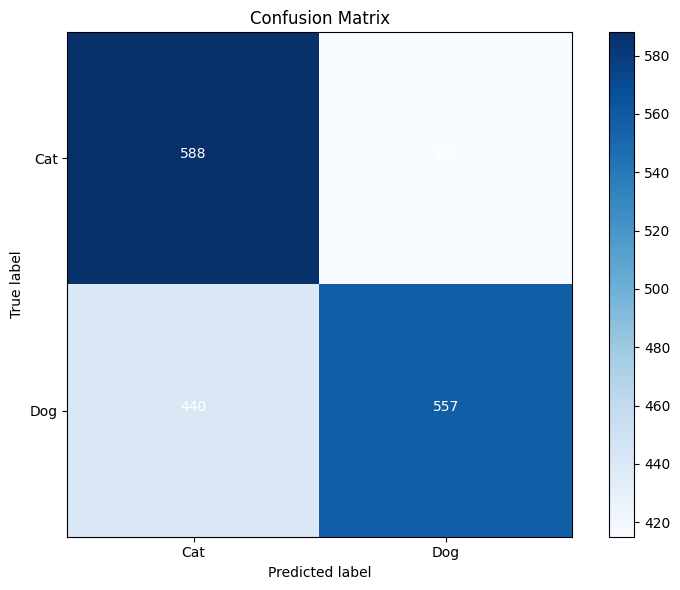

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the Cats vs Dogs dataset from TensorFlow Datasets
dataset, info = tf.keras.datasets.cifar10.load_data()

def preprocess_images(images):
    # Normalize images to the range [0, 1] and flatten them
    images = images.astype('float32') / 255.0
    images = images.reshape(images.shape[0], -1)  # Flatten images
    return images

# Preprocess the dataset
images, labels = dataset
images = preprocess_images(images)

# Filter for only cats (3) and dogs (5)
cat_dog_indices = np.isin(labels, [3, 5]).flatten()
images = images[cat_dog_indices]
labels = labels[cat_dog_indices].flatten()

# Replace labels: 3 (cat) -> 0, 5 (dog) -> 1
labels[labels == 3] = 0
labels[labels == 5] = 1

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train SVM model
svm_model = svm.SVC(kernel='linear')  # You can change the kernel as needed
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Cat', 'Dog'])
plt.yticks(tick_marks, ['Cat', 'Dog'])

# Adding confusion matrix values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()